In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [10]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from scipy import stats

In [103]:
#Load the data set
#You can find data set at below url as mentioned:
#https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('D:/DataScience/Kaggle DS/titanic/train.csv')

In [104]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Check for Null data
titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
#Lest check the null count
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
len(titanic_df)

891

In [18]:
#Since we have more than 30% null data in Cabin Column so we will drop this column for our model prep.

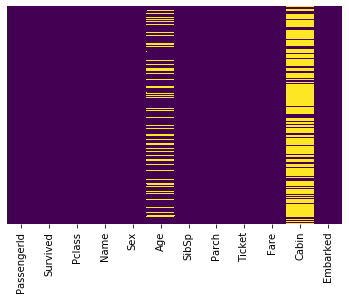

In [21]:
#Lets Graphocally explore the null data; we will create the heat map for the same
sns.heatmap(titanic_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

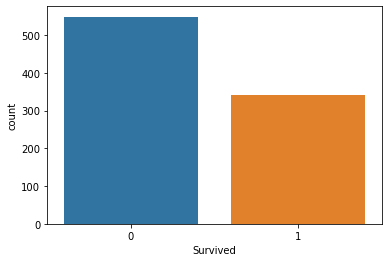

In [22]:
#Lets check the survival count(0: NOt survived, 1 = survived)
sns.countplot(x ='Survived', data = titanic_df)

In [ ]:
#Let's do some Exploratory Data Analysis(EDA)

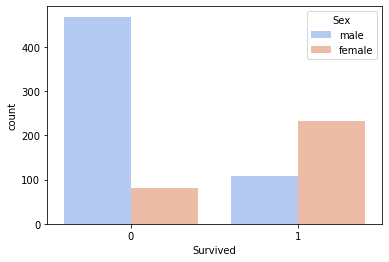

In [25]:
#Check based on Sex
sns.countplot(x='Survived', data= titanic_df, hue = 'Sex', palette='coolwarm')

In [26]:
#It seems from the plot that many 'females' are survived instead of 'male'

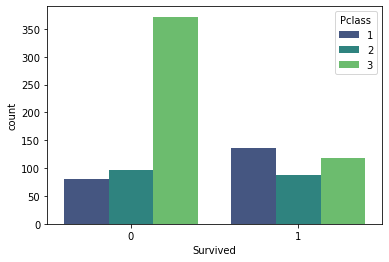

In [31]:
#Let's check the survival rate of people PClass wise
sns.countplot(x='Survived', data= titanic_df, hue = 'Pclass', palette='viridis')

In [32]:
#It seems that the most survived people are from Pclass 1

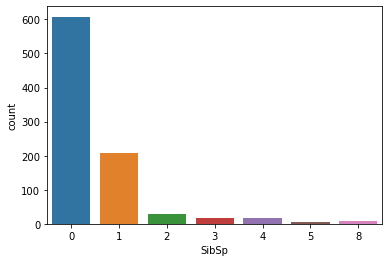

In [33]:
#Lets check the types of people in the ship
sns.countplot(x='SibSp', data = titanic_df)

In [34]:
#It look's many people are single or not travelling with their spause

In [42]:
#Let's explore how much fair paid by the people
cf.go_offline()
titanic_df['Fare'].iplot(kind='hist',bins = 30)

In [43]:
#It means many people are travelling the 3rd class that is the cheaper class

In [44]:
#Lets start with null imputataion of data set

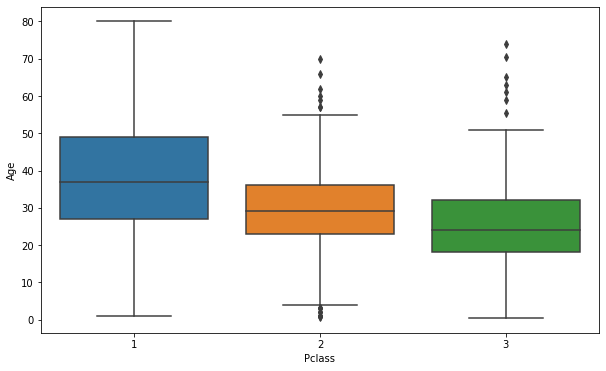

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data = titanic_df)

In [47]:
#Data tells us that elder people are in Class 1 and so on.
#From the the plot its clear that average of Class1 people is 37, Class 2 is 29 and class 3 is 25

In [69]:
def age_imput(cols):
    age    = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 25
    else:
        return age

In [105]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(age_imput, axis=1)

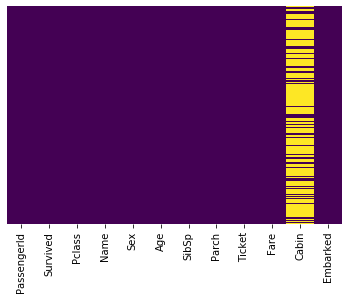

In [106]:
#Lets check the age again
sns.heatmap(titanic_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [133]:
#Now we will drop the cabin as it contains more than 30% null data
titanic_df.drop('Cabin', axis=1, inplace=True)

In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
#Again check for any null value
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [107]:
#Since Embarked has only 2 missing rows so we will drop this rows
titanic_df.dropna(inplace=True)

In [99]:
#Again check for any null value
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [81]:
#Now our data is clean to proceed further with model building

In [109]:
#Step 1 : To encode the Categorical column to dummy variable so the machine will understand the input
#Do it for sex and embarked col
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [110]:
sex.head() 

,male
1,0
3,0
6,1
10,0
11,0


In [111]:
#Add above column
titanic_df = pd.concat([titanic_df, sex,  embark ], axis=1)
# Some of the columns are not useful for building model so we will remove those columns
titanic_df.drop(['Sex', 'Embarked','Name','Ticket'], axis=1,inplace=True)

In [118]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [120]:
#PassengerId is also not useful so we will drop this column also:
titanic_df.drop('PassengerId', axis=1, inplace = True)

In [121]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,1,1,38.0,1,0,71.2833,C85,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1
6,0,1,54.0,0,0,51.8625,E46,1,0,1
10,1,3,4.0,1,1,16.7000,G6,0,0,1
11,1,1,58.0,0,0,26.5500,C103,0,0,1


In [123]:
#Now our data set is ready for building model
X = titanic_df.drop('Survived', axis = 1)

In [125]:
Y = titanic_df['Survived']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
logmodel = LogisticRegression()

In [139]:
logmodel.fit(X_train, y_train)

c:\users\abhii_singhh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
prediction = logmodel.predict(X_test)

In [147]:
#Evaluate the model
from sklearn.metrics import classification_report
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.60      0.71      0.65        17\n           1       0.89      0.84      0.87        50\n\n    accuracy                           0.81        67\n   macro avg       0.75      0.77      0.76        67\nweighted avg       0.82      0.81      0.81        67\n'

In [148]:
#Accuracy of the model is 81% which looks good 

In [150]:
#Lets check the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[12,  5],
       [ 8, 42]], dtype=int64)

In [164]:
#Find classification anmd missclassification rate manually
cls = (12+42)/67
mcls = (5+8)/67
print("Classification rate:",cls,"and Misclassification rate:",mcls)

Classification rate: 0.8059701492537313 and Misclassification rate: 0.19402985074626866


In [171]:
#In colclusion model is good fit